# INSURANCE AMOUNT PREDICTION

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

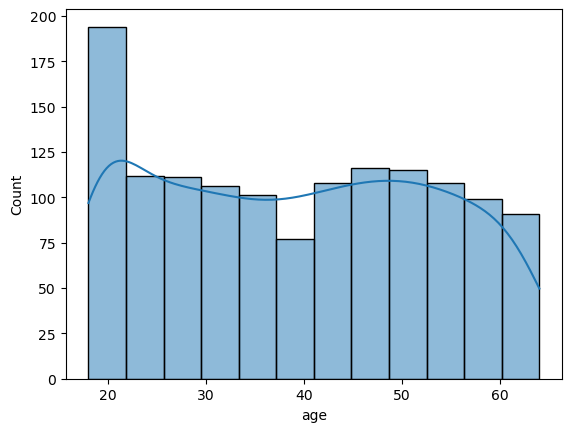

In [6]:
sns.histplot(x=df['age'], kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

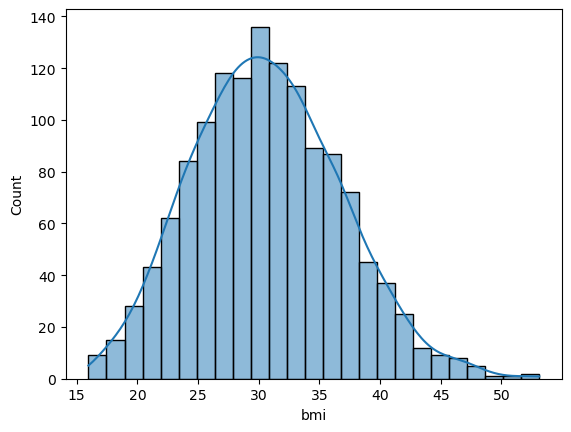

In [7]:
sns.histplot(x=df['bmi'], kde=True)

<Axes: xlabel='children', ylabel='Count'>

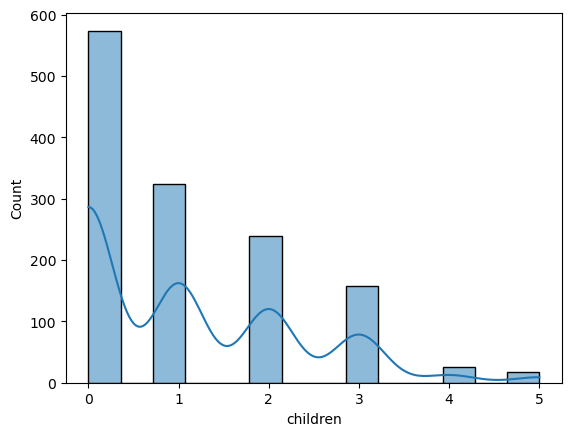

In [8]:
sns.histplot(x=df['children'], kde=True)

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='sex', ylabel='count'>

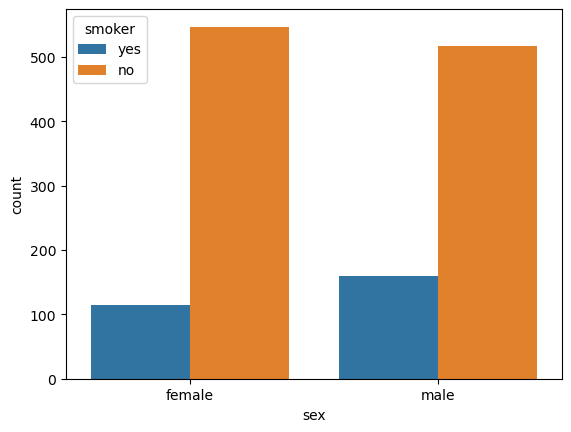

In [10]:
sns.countplot(x=df["sex"],hue=df["smoker"])

<Axes: xlabel='age', ylabel='Count'>

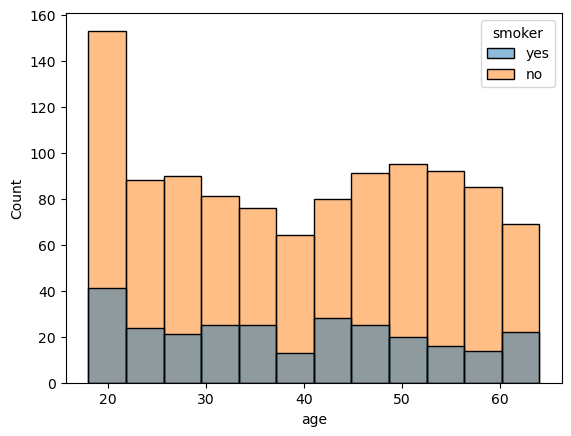

In [11]:
sns.histplot(x = df["age"], hue=df["smoker"])

<Axes: >

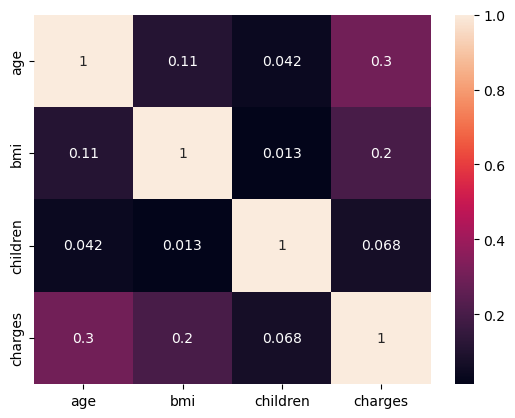

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Feature Engineering

In [13]:
df['BMI_Underweight'] = (df['bmi'] < 18.5).astype(int)
df['BMI_Normal']      = ((df['bmi'] >= 18.5) & (df['bmi'] < 25)).astype(int)
df['BMI_Overweight']  = ((df['bmi'] >= 25) & (df['bmi'] < 30)).astype(int)
df['BMI_Obese']       = (df['bmi'] >= 30).astype(int)

print(df[['bmi', 'BMI_Underweight', 'BMI_Normal', 'BMI_Overweight', 'BMI_Obese']].head())

      bmi  BMI_Underweight  BMI_Normal  BMI_Overweight  BMI_Obese
0  27.900                0           0               1          0
1  33.770                0           0               0          1
2  33.000                0           0               0          1
3  22.705                0           1               0          0
4  28.880                0           0               1          0


In [14]:
df

,age,sex,bmi,children,smoker,region,charges,BMI_Underweight,BMI_Normal,BMI_Overweight,BMI_Obese
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1,0


### Encoding

In [15]:
X = df.drop(columns="charges")
y = df["charges"]

In [16]:
X_encoded = X.copy()

In [17]:
X_encoded = pd.get_dummies(X_encoded, drop_first=True)
X_encoded = X_encoded.astype(int)
X_encoded

,age,bmi,children,BMI_Underweight,BMI_Normal,BMI_Overweight,BMI_Obese,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,0,1,0,0,1,0,0,1
1,18,33,1,0,0,0,1,1,0,0,1,0
2,28,33,3,0,0,0,1,1,0,0,1,0
3,33,22,0,0,1,0,0,1,0,1,0,0
4,32,28,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,0,0,0,1,1,0,1,0,0
1334,18,31,0,0,0,0,1,0,0,0,0,0
1335,18,36,0,0,0,0,1,0,0,0,1,0
1336,21,25,0,0,0,1,0,0,0,0,0,1


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Scaling the Data

In [19]:
scaler = StandardScaler()
X_encoded[['age',"bmi", "children"]] = scaler.fit_transform(X_encoded[['age',"bmi", "children"]])

In [20]:
X_encoded

,age,bmi,children,BMI_Underweight,BMI_Normal,BMI_Overweight,BMI_Obese,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.518122,-0.908614,0,0,1,0,0,1,0,0,1
1,-1.509965,0.462657,-0.078767,0,0,0,1,1,0,0,1,0
2,-0.797954,0.462657,1.580926,0,0,0,1,1,0,0,1,0
3,-0.441948,-1.335438,-0.908614,0,1,0,0,1,0,1,0,0
4,-0.513149,-0.354659,-0.908614,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,-0.027733,1.580926,0,0,0,1,1,0,1,0,0
1334,-1.509965,0.135731,-0.908614,0,0,0,1,0,0,0,0,0
1335,-1.509965,0.953046,-0.908614,0,0,0,1,0,0,0,1,0
1336,-1.296362,-0.845048,-0.908614,0,0,1,0,0,0,0,0,1


### Model Development

#### Using Linear Regression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.32, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)

In [22]:
# Model Evaluation
n = X_test.shape[0]   # number of samples
p = X_test.shape[1]   # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R²:", r2)
print("Adjusted R²:", adj_r2)

R²: 0.7636714703219583
Adjusted R²: 0.7568543011966301


#### Using Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
r1 = r2_score(y_test,y_pred1)

In [24]:
# Model Evaluation
adj_r1 = 1 - (1 - r1) * (n - 1) / (n - p - 1)

print("R²:", r1)
print("Adjusted R²:", adj_r1)

R²: 0.8480033752187703
Adjusted R²: 0.8436188571962349


### Done